# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [205]:
# Your code here
def monty_hall_sim(nsim=1000, change='no'):

    results = []  # container for result (win or loss) of each simulation
    cum_prob = []  # container for cumulative success rate values for plotting

    for i in range(nsim):

        doors = [1, 2, 3]  # list representing door choices

        # set the door position of the car
        car = np.random.choice(doors, size=1, replace=True)[0]

        # player's initial door selection
        first_c = np.random.choice(doors, size=1, replace=True)[0]

        if change == 'no':
              # contestant does not change their choice, sticks with original door choice
            if car == first_c:  # if contestant guessed correctly, append 1 to results
                results.append(1)
            else:  # if contestant guessed incorrectly, append 0 to results
                results.append(0)

        else:  # if change='yes' - contestant makes a new door choice and abandons the first

            # since we are changing, and we know we guessed right the first time, append 0 (wrong)
            if car == first_c:
                results.append(0)
            else:  # if we didn't guess right on the first choice and we change, we are guaranteed to win if we switch
                results.append(1)

    for i in range(len(results)):
        
        cum_prob.append(sum(results[:i + 1]) / len(results[:i + 1]))
        
    ax = plt.plot(range(nsim), cum_prob)
    plt.xlabel('# of Simulations')
    plt.ylabel('Cumulative Win Percentage')
    plt.title(f'Game Win Percentage When Change = {change}')
    
    print(
        f'The contestant said {change} to changing doors and won the car {sum(results)} times out of {len(results)} tries.')
    
    return ax
        
    

The contestant said no to changing doors and won the car 316 times out of 1000 tries.


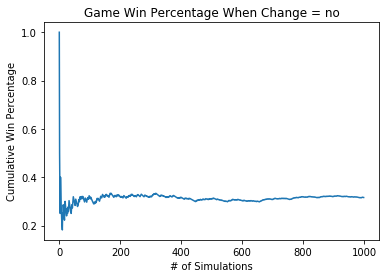

In [220]:
monty_hall_sim(nsim=1000, change='no')

The contestant said yes to changing doors and won the car 681 times out of 1000 tries.


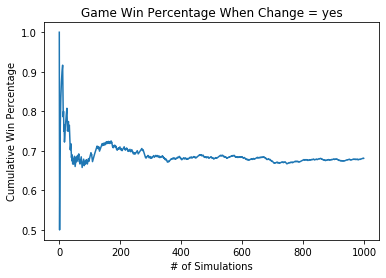

In [221]:
monty_hall_sim(nsim=1000, change='yes')

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 